<a href="https://colab.research.google.com/github/DanielT-M/project1-ds_santander-f3-team6-data_analysis_in_Phyton/blob/daniel/Proyecto_Postwork1_2_3_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="problema"></a>
# <font color=green>Identificación del Problema</font>

Para cualquier nuevo emprendedor, existe una serie de retos que lo abruman en su aventura de iniciar un nuevo negocio. La mayor incertidumbre es poder disponer de la información necesaria que lo apoye en la toma correcta de decisiones y así mitigar los riesgos de una mala inversión de tiempo y dinero.

Para esto, sería de gran ayuda proveerle a cada emprendedor de herramientas que le aporten información ordenada, certera y fidedigna; de tal forma que le otorgue seguridad y mayor certeza de si su idea será rentable o no.

Por lo tanto, sin lugar a duda, la **ciencia de datos** es la mejor herramienta que permitiría la creación de este tipo de herramientas de apoyo para un emprendedor y su nuevo negocio.

## Investigación al respecto del problema

En esta sección ira la investigación

## Búsqueda de soluciones anteriores

En esta sección irá las soluciones previas

<a id="preguntas"></a>
# <font color=green>Planteamiento de Preguntas </font>

De acuerdo con el problema planteado anteriormente, surgieron las siguientes preguntas tanto del emprendedor como del equipo:

1.  ¿Cuál es la mejor ubicación en Guadalajara, México para abrir mi negocio de bicicletas?
2. ¿Qué tantas ventas podré obtener en los primeros meses de iniciado mi negocio?
3. ¿Cuáles son los productos más demandados por los potenciales clientes?
4. ¿Qué precios serán los más competitivos para las bicicletas?
5. ¿Qué tan frecuente un cliente querrá comprar ropa o accesorios para sus bicicletas?
6. ¿Qué tantos clientes acudirán a mi negocio por una reparación o mejora en su bicicleta?

Aunque no tenemos seguridad si podremos responder todas las preguntas planteadas, se le comentó al emprendedor que se hará un análisis de la data disponible y se evaluará que información se le puede presentar.



# Colección de Datos
Se tomo la decision de usar "Bike Buyers 1000" y "Bike Sales", dado que contienen informacion relevante a la problematica sobre la cual se esta tratando y ambos datasets se complementan, los cuales fueron encontrados en kaggle.

"Bike Buyers 1000" 
link: "https://www.kaggle.com/datasets/heeraldedhia/bike-buyers"

"Bike Sales"
link: "https://www.kaggle.com/datasets/liyingiris90/bike-sales"

## Proceso para obtener el dataset

Dado que los archivos contenidos dentro del conjunto de datos de Bike Sales estan en formato .xlsx, se uso la funcion <font color =red> *pd.read_excel* </font> de pandas.

Para Bike Buyers al ser un formato csv, se usa nuestra funcion ya conocida  <font color =red> *pd.read_csv*</font>  

Se importan las siguientes librerias...

In [ ]:
!pip install colorama

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from colorama import Fore
from colorama import Style
import matplotlib.pyplot as plt
sns.set()
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

Se guardan los respectivos DataFrames del conjunto de datos <font color=blue> "bike sales"</font> y <font color=blue> "bike buyers"

In [ ]:
compradores = pd.read_csv("https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv")

In [ ]:
bikes = pd.read_excel('https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikes.xlsx?raw=true')
bikestores = pd.read_excel("https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true")
orders = pd.read_excel("https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/orders.xlsx?raw=true")

# Exploracion de los Datasets
Procedemos a revisar cada DataFrame usando <font color=blue> .head() </font> y <font color=blue>.tail()  </font>, asi como <font color=blue> .dtypes, .columns, .shape, .loc[$n:m$] </font> (donde $n,m ∈ 𝖭$ y $n<m.$) 

In [ ]:
compradores.dtypes #Se tienen flotantes que deberian de ser enteros.
compradores.shape #Se tienen 1000 entradas y 13 columnas.
compradores.columns # ID, Marital S, Gender, Income, Children, Education, Occupation, Home Owner, Cars, Commute Distance, Region, Age, purchase bike
compradores.head() # Se observan NaNs
compradores.tail() # Se observan NaNs
c=list(compradores.columns) # Se guarda el nombre de las columnas en una lista, que sera usada mas adelante para cambiar los nombres de nuestro dataframe. 
compradores.loc[500:515] # Se observan Nans. 

In [ ]:
bikes.dtypes # El unico data que parecer ser incorrecto es el precio, que es de tipo int. 
bikes.shape # Se tienen un total de 97 filas con 5 columnas
bikes.columns # bike.id, model, category1, category2, frame, price. Se renombraran columnas.
bikes.head() #No se observan Nans.
bikes.tail() #No se observan Nans.
bc=list(bikes.columns)
bikes.loc[46:58] # No se observan Nans de forma aleatoria

In [ ]:
bikestores.dtypes # Todos los datos tienen el tipo correcto.
bikestores.shape # Se tienen un total de 30 filas con 6 columnas
bikestores.columns # bikeshop.id , bikeshop.name, bikeshop.city, bikeshop.state, latitude , longitude. Se renombraran columnas.
bikestores.head() # No se observan Nans.
bikestores.tail() # No se observan Nans.
bs=list(bikestores.columns)
bikestores.loc[10:25] #No se observan Nans. 

In [ ]:
orders.dtypes # Se observa que order.id, order.line, customer.id y product.id son de tipo flotante cuando deberian de ser de tipo entero.
orders.shape # Tiene un total de 15644 filas y 7 columnas. 
orders.columns #'Unnamed: 0', 'order.id', 'order.line', 'order.date', 'customer.id','product.id' y 'quantity'. Se renombraran las columnas.
oc=list(orders.columns) 
orders.head() #No se observan Nans, por otro lado, se observa que la columna 'Unnamed: 0' esta repetida. 
orders.tail() # No se observan Nans. 
orders.loc[10468:10480] # no se observan Nans.

Conociendo los valores de algunas columnas de algunos dataSets

In [ ]:
orders['product.id'].unique()

In [ ]:
orders['customer.id'].unique()

In [ ]:
bikes['bike.id'].unique()

In [ ]:
bikestores['bikeshop.id'].unique()

#Renombramos las columnas en los DataFrames.

Se crean diccionarios para cambiar el nombre de las columnas de nuestros data frames.

In [ ]:
comp_names = {c[0]:'id_comprador',
              c[1]:'estado_civil',
              c[2]:'genero',
              c[3]:'sueldo',
              c[4]:'hijos',
              c[5]:'educacion',
              c[6]:"profesion",
              c[7]:"posee_casa",
              c[8]:'autos',
              c[9]:'distancia_d_viaje',
              c[10]:'region',
              c[11]:'edad',
              c[12]:'bicicleta_adquirida'}

bike_names = {bc[0]:'id_bicicleta',
              bc[1]:'modelo',
              bc[2]:'categoria_1',
              bc[3]:'categoria_2',
              bc[4]:'aleacion',
              bc[5]:'precio'}

stores_nombres = {bs[0]:'id_tienda',
                  bs[1]:'nombre_tienda',
                  bs[2]:'ciudad',
                  bs[3]:'estado',
                  bs[4]:'latitud',
                  bs[5]:'longitud'}

orders_nombres = {oc[1]:'id_orden',
                  oc[2]:'orden_line',
                  oc[3]:'orden_date',
                  oc[4]:'id_tienda',
                  oc[5]:'id_bicicleta',
                  oc[6]:'numero_items'}

Nos percatamos del hecho, de que la columna customer_id es realmente el id_tienda. Dado que ambas coinciden con el numero de entradas y los valores asociados a cada una. 

In [ ]:
compradores = compradores.rename(columns=comp_names)
ordenes = orders.rename(columns=orders_nombres)
bicicletas = bikes.rename(columns=bike_names)
tiendas =  bikestores.rename(columns=stores_nombres)

# Eliminación de NaNs

EPara tener unos DataFrames mas limpios, se eliminan los NaNs

In [ ]:
# Se crean las siguientes funciones para determinar NaNs entre los distintos DataFrames.
def numero_nans(dataframe):
    print(dataframe.isna().sum())

def porcentaje_nans(dataframe):
  print(dataframe.isna().sum()/len(dataframe)*100)

In [ ]:
porcentaje_nans(ordenes)
porcentaje_nans(tiendas)
porcentaje_nans(bicicletas)
porcentaje_nans(compradores) #El unico DataFrame con Nans presentes, es el de Compradores. 
numero_nans(compradores)

Se llanan las Nans. 

In [ ]:
compradores[['hijos','autos']] = compradores[['hijos','autos']].fillna(0)
compradores['estado_civil'] = compradores['estado_civil'].fillna('Single')
compradores['posee_casa'] = compradores['posee_casa'].fillna('No')
compradores =compradores.dropna(how='any')
compradores = compradores.reset_index(drop=True) 
numero_nans(compradores)

#Se procede a cambiar el tipo de dato de cada DataFrame.

Para esto crearemos diccionarios con los nuevos tipos de datos y aplicaremos la funcion de pandas *.astype()*

In [ ]:
print(ordenes.dtypes) # Tiene flotantes que deben de ser enteros. 
print(tiendas.dtypes) # Tiendas tiene todos los tipos de datos correctos.
print(compradores.dtypes) # Tiene flotantes que deben de ser enteros. 
print(bicicletas.dtypes) # Tiene un int que deberia de ser flotante. 

In [ ]:
c=list(compradores.columns)
oc=list(ordenes.columns)
nuevos_types_compra = {c[4]:int,
         c[8]:int,
         c[11]:int}

new_types_orders ={oc[1]:int,
                   oc[2]:int,
                   oc[4]:int,
                   oc[5]:int,
                   oc[6]:int}

In [ ]:
ordenes = ordenes.astype(new_types_orders)
compradores = compradores.astype(nuevos_types_compra)
bicicletas['precio'] = bicicletas['precio'].astype(float) # Se usa este metodo, dado que solo hay que cambiar de tipo de dato a una variable.

##Procederemos a eliminar la columna 'Unnamed: 0' del DataFrame ordenes

In [ ]:
ordenes.drop(columns='Unnamed: 0',inplace=True)

#Procedemos a unir las diferentes tablas para posteriormente realizar las agregaciones adecuadas. 

###Ordenes y Bicicletas.

In [ ]:
or_bikes = pd.merge(ordenes,bicicletas,left_on='id_bicicleta',right_index=True)
or_bikes.drop(columns=['id_bicicleta_x','id_bicicleta_y'], inplace=True)
or_bikes

###Tiendas y Ordenes

In [ ]:
str_orders = pd.merge(ordenes,tiendas,left_on='id_tienda',right_index=True)
str_orders.drop(columns=['id_tienda_x','id_tienda_y'])

##Tiendas, Bicicletas y Ordenes

Para obtener las verdaderas ganancias por cada bicicleta se crea una nueva columna llamada total. 

In [ ]:
total_vendido = or_bikes['numero_items']*or_bikes['precio']
or_bikes['total'] = total_vendido
or_bikes

In [ ]:
str_or_bks = pd.merge(or_bikes,tiendas,left_on='id_tienda',right_index=True)
str_or_bks.drop(columns=['id_tienda_x','id_tienda_y'],inplace=True)
str_or_bks


#Agregaciones

##Numero de items vendidos por cada tienda

In [ ]:
str_orders.groupby(['nombre_tienda'])['numero_items'].sum().sort_values(ascending=False).head(5) ## SE USA HEAD  para no Mostrar tantos resultados

Las tiendas que mas han vendido con su respectivo total son...
>New York Cycles          ~       3471

>Minneapolis Bike Shop      ~     2301

>Las Vegas Cycles            ~    1419

>Columbus Race Equipment      ~   1264

>Albuquerque Cycles            ~  1155

Mientras que las de menores vendas se conforman por... con un total de..
>Phoenix Bi-peds        ~          246

>Providence Bi-peds      ~       245

>Oklahoma City Race Equipment  ~   234

>Wichita Speed                  ~ 186

>Ann Arbor Speed                ~  128

## Bicicletas Menos y Mas vendidas

In [ ]:
or_bikes.groupby('modelo')['numero_items'].sum().sort_values(ascending=False)

Las Bicicletas mas vendidas fueron... con un total de...
>Slice Ultegra        ->              301

>F-Si 3                ->             293

>F-Si Black Inc.         ->           293

>Supersix Evo Ultegra 4    ->         290

>CAAD Disc Ultegra           ->       282


Mientras que las menos vendidas fueron... con un total de...
>Habit 4              ~              143

>Habit Carbon 2        ~             143

>Habit Carbon SE        ~            140

>Synapse Carbon Disc Ultegra D12  ~  139

>Jekyll Carbon 4                ~    132

##Ganancias Obtenidas por cada Bicicleta

In [ ]:
or_bikes.groupby('modelo')['total'].sum().sort_values(ascending=False)

Las mejores y peores ganancias obtenidos por bicicleta fueron las siguientes... con un total de...
>Scalpel-Si Black Inc.     ~        3299820.0

>F-Si Black Inc.            ~       3278670.0

>Habit Hi-Mod Black Inc.     ~      2670500.0

>Trigger Carbon 1             ~     2140200.0

>Synapse Hi-Mod Disc Black Inc. ~    2100210.0


Mientras que las peores...
>Trail 5    ~                        212715.0

>Catalyst 1  ~                      184710.0

>Catalyst 2   ~                      119925.0

>Catalyst 3    ~                     118080.0

>Catalyst 4     ~                     96695.0

##Ganancias obtenidas por cada Tienda

Ya vimos las ganacias que cada bicicleta trae, ahora veamos las ganancias de cada tienda, para esto sera necesario mezclar las tres tablas.

In [ ]:
str_or_bks.groupby('nombre_tienda')['total'].sum().sort_values(ascending=False).head(5) ## SE USA HEAD  para no Mostrar tantos resultados

###Veamos que las tiendas con mayores ganancias son... con un total de...
>New York Cycles         ~        12476315.0

>Minneapolis Bike Shop    ~        8018850.0

>Columbus Race Equipment   ~       5635205.0

>Las Vegas Cycles           ~      4763175.0

>Albuquerque Cycles          ~     3959000.0

###Mientras que aquellas con menores ganancias...
>Providence Bi-peds                819110.0

>Oklahoma City Race Equipment ~     763390.0

>Phoenix Bi-peds               ~    737905.0

>Wichita Speed                  ~   665510.0

>Ann Arbor Speed                 ~  408680.0

##Ganancias por Orden

Ahora veamos las ganancias por orden... 

>Mas adelante sacaremos la mediana, la media y la moda de todas estas agregaciones que hemos estado haciendo. 

In [ ]:
or_bikes.groupby('id_orden')['total'].sum().sort_values(ascending=False)

## Mejores cuidades para vender

In [ ]:
str_or_bks.groupby('ciudad')['total'].sum().sort_values(ascending=False).head(5)## SE USA HEAD  para no Mostrar tantos resultados

##Como podemos observar a continuacion las mejores ciudades son... con un total recaudado de...
>*New York*   ~      12476315.0

>Minneapolis    ~   8018850.0

>Columbus        ~  5635205.0

>Las Vegas        ~ 4763175.0

>Albuquerque       ~ 3959000.0

##Menores ganancias en estas ciudades
>

>

>Providence   ~      819110.0

>Oklahoma City ~     763390.0

>Phoenix        ~    737905.0

>Wichita         ~   665510.0

>Ann Arbor        ~  408680.0

##Primeros Meses de Ventas

###Ventas totales por Mes

In [ ]:
or_bikes.groupby([pd.Grouper(key='orden_date', axis=0, 
                      freq='M')])['total'].sum().head(5) ## SE USA HEAD  para no Mostrar tantos resultados

###Ventas totales de cada mes de cada tienda


In [ ]:
or_bikes.groupby(['id_tienda',pd.Grouper(key='orden_date', axis=0, 
                      freq='M')])['total'].agg('sum')

###Se decide tomar el promedio

In [ ]:
or_bikes.groupby([pd.Grouper(key='orden_date', axis=0, freq='M')])['total'].mean().head(5) ## SE USA HEAD  para no Mostrar tantos resultados

##Aleacion y Categorias mas Vendidas

In [ ]:
or_bikes.groupby(['aleacion','categoria_1','categoria_2'])['total'].count()

#PostWork 1
> Obtener Promedio, Mediana, Media Truncada, Desviacion Estandar, Rango e Intercuantilico, Percentiles 25 y 75. 

In [ ]:
from statistics import mode
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

###Datos a trabajar, se tienen 13 agregaciones hasta el momento.
> Se espera hacer mas divisiones en los datos.

In [ ]:
real_buyers = compradores[compradores['bicicleta_adquirida']=='Yes'].reset_index(drop=True)
real_buyers.drop(columns='bicicleta_adquirida',inplace=True) #Para omitir redundancia se elimina la columna 'bicicleta_adquirida'
real_buyers

Dada la problematica que se tiene se dicide sacar estimados de locacion y variabilidad en la cantidad de items vendidos por cada tienda, bicicleta, asi como las ganancias obtenidas respectivamente entre otros datos de igual relevancia, asi como la edad de los clientes y compradores de bicicletas.

> Esto con la finalidad de poder observar si hay valores atipicos en nuestros datos o no, y que tanto pueden presentar un problema a la hora de evaluar nuestros modelos de regresion. 

In [ ]:
items_sold_per_tienda = str_orders.groupby(['nombre_tienda'])['numero_items'].sum().sort_values(ascending=False)
items_sold_per_bici = or_bikes.groupby('modelo')['numero_items'].sum().sort_values(ascending=False)
gains_per_bici = or_bikes.groupby('modelo')['total'].sum().sort_values(ascending=False)
gains_per_tienda = str_or_bks.groupby('nombre_tienda')['total'].sum().sort_values(ascending=False)
gain_per_order = or_bikes.groupby('id_orden')['total'].sum().sort_values(ascending=False)
gain_per_city = str_or_bks.groupby('ciudad')['total'].sum().sort_values(ascending=False)
gain_per_month_from_all = or_bikes.groupby([pd.Grouper(key='orden_date', axis=0, freq='M')])['total'].sum()
gain_per_month_per_tienda = or_bikes.groupby(['id_tienda',pd.Grouper(key='orden_date', axis=0, freq='M')])['total'].sum();
or_bikes['precio']
or_bikes['total'];

##Funcion para los Estimados de Locación y Variabilidad

In [ ]:
def all_in_one_variability(x):
  print(f'{Fore.CYAN}Media {Style.RESET_ALL}~ {x.mean()}') #688.48   ~ Media
  print(f'{Fore.CYAN}Mediana {Style.RESET_ALL}~ {x.median()}') #405          ~ Mediana
  print(f'{Fore.CYAN}Media Truncada {Style.RESET_ALL}~ {stats.trim_mean(x,.1)}') #555.2  ~ Media Truncada de un 10% de los datos a los lados. 
  print(f'{Fore.CYAN}Desviacion Estandar {Style.RESET_ALL}~ {x.std()}')    #703.02  ~ Desviacion Estandar
  print(f'{Fore.CYAN}Rango {Style.RESET_ALL}~ {x.max() - x.min()}') # 3343 ~ Rango
  print(f'{Fore.CYAN}Quantil 75 {Style.RESET_ALL}~ {x.quantile(.75)}') # 657 ~ Quantile 75
  print(f'{Fore.CYAN}Quantil 25 {Style.RESET_ALL}~ {x.quantile(.25)}') # 319 ~ Quantile 25
  print(f'{Fore.CYAN}Rango Intercuantilico {Style.RESET_ALL}~ {x.quantile(.75) - x.quantile(.25)}') #338 ~ Rango intercuantilico

##Items Vendidos por Tienda

In [ ]:
all_in_one_variability(items_sold_per_tienda)

##Items vendidos por Bici

In [ ]:
all_in_one_variability(items_sold_per_bici)

##Ganancias por Bici

In [ ]:
all_in_one_variability(gains_per_bici)

##Ganancias por Tienda

In [ ]:
all_in_one_variability(gains_per_tienda)

##Ganancias por Orden

In [ ]:
all_in_one_variability(gain_per_order)

##Ganancias por Ciudad

In [ ]:
all_in_one_variability(gain_per_city)

##Ganancias por Mes de Todas las tiendas

In [ ]:
all_in_one_variability(gain_per_month_from_all)

##Ganancias por Mes de Cada Tienda

In [ ]:
all_in_one_variability(gain_per_month_per_tienda)

##Subtotal 

In [ ]:
all_in_one_variability(or_bikes['total'])

##Edad de Clientes (No implica que hayan comprado bicicletas)

In [ ]:
all_in_one_variability(compradores['edad'])

##Edad de Compradores de Bicicletas

In [ ]:
all_in_one_variability(real_buyers['edad'])

## Salario de Clientes (No implica que hayan comprado una bicicleta)

In [ ]:
all_in_one_variability(compradores['sueldo'])

##Salario de Compradores de Bicicletas

In [ ]:
all_in_one_variability(real_buyers['sueldo'])

#PostWork 2
>Utilizar boxplots para visualizar distribuciones.

>Filtrar valores atípicos usando el Score de Rango Intercuartílico.

>Caracterizar nuestras distribuciones usando tablas de frecuencias, histogramas y gráficas de densidad.

##Nota

> Dado que son demasiados datos por analizar se deja una conclusion al final de todos nuestros graficos y hallazgos generales al final. No obstante se hace un analisis en los datos que se consideran mas relevantes para nuestros futuros modelos.

> Raw ~ Se hace como referencia aquellos datos que no han sufrido cambios tales como el Score de Rango Intercuartílico (IQR-Score).

>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from colorama import Fore
from colorama import Style

In [ ]:
sns.color_palette("crest", as_cmap=True)

###Funcion para Graficos de Densidad, Histograma y Boxplot

In [ ]:
def graficas_boxplots_density(xyz,i):
  o=['Items Vendidos por Tienda','Demanda de Bicis','Ganancias por Bici','Ganancias Obtenidas por Tienda','Ganancias Obtenidas por Orden','Ganancias Obtenidas por Ciudad', 'Ventas por Mes Generales','Ventas por Mes de cada Tienda','SubTotal','Edad de Clientes','Edad de Compradores'
  ,'Salario de Clientes','Salario de Compradores']
  sns.set(style="white")
  fig, axes = plt.subplots(1, 3, figsize=(30, 6), sharex=False, sharey=False)
  sns.boxplot(x=xyz, ax=axes[0]); # Boxplot sin Filtrar
  axes[0].set_title(o[i], fontsize=20)
  axes[0].set_xlabel('',fontsize = 16)
  #axes[0].set_xlim(0,4000)
  iqr = xyz.quantile(0.75) - xyz.quantile(0.25)
  filtro_inferior = xyz > xyz.quantile(0.25) - (iqr * 1.5)
  filtro_superior = xyz < xyz.quantile(0.75) + (iqr * 1.5)
  df_filtrado = xyz[filtro_inferior & filtro_superior]
  c = ' ~ Filtrado ~ IQR'
  b = o[i] + c
  axes[1].set_title(b,fontsize=20)
  axes[1].set_xlabel('' ,fontsize = 16)
  sns.boxplot(df_filtrado,ax=axes[1])
  d = ' ~ Densidad e Histograma'
  e = o[i] + d
  sns.distplot(df_filtrado, bins=16,ax=axes[2]);
  axes[2].set_title(e, fontsize=20)
  axes[2].set_xlabel('', fontsize=16);
  axes[2].set_xlim(xyz.min())
  plt.ylabel('Frequency', fontsize=16);
  #axes[2].set_xlim(0,1500)
  print(f'{Fore.MAGENTA}Estimados de Locación y Variabilidad ~ Datos Sin filtrar{Style.RESET_ALL}')
  all_in_one_variability(xyz)
  print(f'{Fore.GREEN}Curtosis:{Style.RESET_ALL} {kurtosis(xyz)}')
  print(f'{Fore.GREEN}Asimetría: {Style.RESET_ALL}{skew(xyz)}')
  print(f'{Fore.MAGENTA}Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR{Style.RESET_ALL}')
  all_in_one_variability(df_filtrado)#NorbsPR did this.
  print(f'{Fore.GREEN}Curtosis:{Style.RESET_ALL} {kurtosis(df_filtrado)}')
  print(f'{Fore.GREEN}Asimetría:{Style.RESET_ALL} {skew(df_filtrado)}')
  


###Items Vendidos por Tienda

>Como podemos observar a continuacion, se tienen valores atipicos que se extienden a la izquierda de nuestro grafico, por lo que afectan el valor de la media. Tras realizar el Score de Rango intercuantilico se obtienen datos mas reales de la distribucion.

>Podemos observar tambien que los datos se acumulan en la cola derecha de nuestra distribucion.

> Por otra parte se observa que la dispersion de nuestros datos ha disminuido a comparacion a cuando no estaban filtrados. Pasando de tener una Curtosis de 7.23 a una de 1.40. Como era de esperarse, la desviacion estandar de nuestros datos disminuye.

>Finalmente se presenta una lijera asimetria en nuestra distribucion de 1.19.


In [ ]:
graficas_boxplots_density(items_sold_per_tienda,0)

###Demanda de bicicletas (Número de Bicicletas Vendidas por Modelo)

>En esta ocasion se observa que los valores no cambian tras realizar el  Score de Rango intercuantilico. Por lo que se trabajara con los datos originales.

>Podemos observar en el boxplot que los datos se acumulan un poco hacia la cola derecha. Pero no de manera significativa. 

>Tras mirar el valor de la asimetria (0.05) se plantea que quiza la distribucion es normal, pero tras ver el grafico de histograma/densidad nos damos cuenta que nuestra distribucion es en realidad bimodal. 

>Por otro lado se tiene que la curtosis es de -1.31 lo que indica que los datos estan escarpados, por lo que hay una menor dispersion de los datos y con lo cual colas cortas.
>Finalmente se tiene una desviacion estandar de 47.30

In [ ]:
graficas_boxplots_density(items_sold_per_bici,1)

###Ganancias por Bicicleta

In [ ]:
graficas_boxplots_density(gains_per_bici,2)

###Ganancias Totales Por Tienda

In [ ]:
graficas_boxplots_density(gains_per_tienda,3)

##Ganancias por Orden

>A continuacion se observa que gran parte de los datos estan concentrados hacia derecha de nuestro boxplot, de igual forma, se presentan demasiados valores atipivos concentrados a la izquierda de nuestro grafico (boxplot).

>A partir de aqui, se toma la decision de aplicar un filtro IQR de los datos, con la finalidad de evitar sesgos en el futuro, dado que los modelos de regresion son muy sensibles a datos atipicos, en otras palabras, se tiene un menor performance.

>Se tiene una asimetria postiva, lo que corrobora que los datos realmente estan cargados hacia la derecha de nuestro grafico.

>Finalmente la desviacion estandar disminuye en nuestros datos, lo que implica que estos estan menos dispersos a comparacion de nuestros datos raw.

In [ ]:
graficas_boxplots_density(gain_per_order,4)

###Ganancias por Ciudad

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 2495311.896551724
Mediana ~ 1784195.0
Media Truncada ~ 2031787.6
Desviacion Estandar ~ 2527327.7547375625
Rango ~ 12067635.0
Quantil 75 ~ 2256410.0
Quantil 25 ~ 969910.0
Rango Intercuantilico ~ 1286500.0
Curtosis: 7.031233624707802
Asimetría: 2.6115810799010584
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 1658820.0
Mediana ~ 1563795.0
Media Truncada ~ 1597420.238095238
Desviacion Estandar ~ 822136.4703979099
Rango ~ 3550320.0
Quantil 75 ~ 2159010.0
Quantil 25 ~ 958275.0
Rango Intercuantilico ~ 1200735.0
Curtosis: 0.6023836657968378
Asimetría: 0.7502937263092925


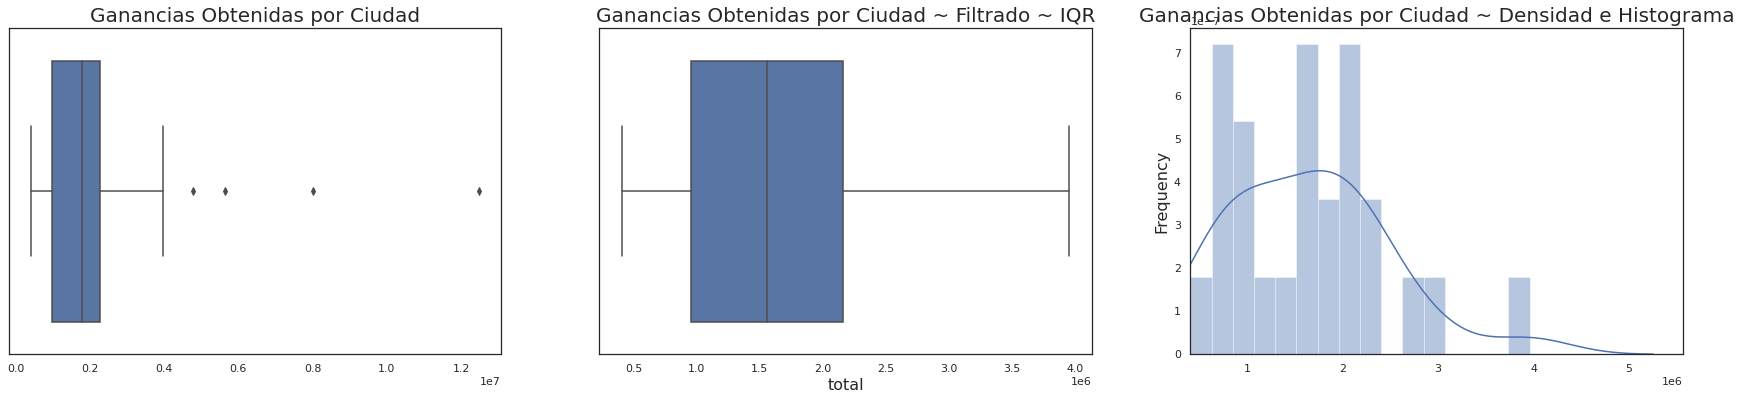

In [ ]:
graficas_boxplots_density(gain_per_city,5)

###Ganancias por Mes Generales

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 1221621.1666666667
Mediana ~ 1108715.0
Media Truncada ~ 1185452.0833333333
Desviacion Estandar ~ 513144.31856353977
Rango ~ 2165340.0
Quantil 75 ~ 1522216.25
Quantil 25 ~ 860363.75
Rango Intercuantilico ~ 661852.5
Curtosis: -0.49846149088064484
Asimetría: 0.611685483389598
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 1221621.1666666667
Mediana ~ 1108715.0
Media Truncada ~ 1185452.0833333333
Desviacion Estandar ~ 513144.31856353977
Rango ~ 2165340.0
Quantil 75 ~ 1522216.25
Quantil 25 ~ 860363.75
Rango Intercuantilico ~ 661852.5
Curtosis: -0.49846149088064484
Asimetría: 0.611685483389598


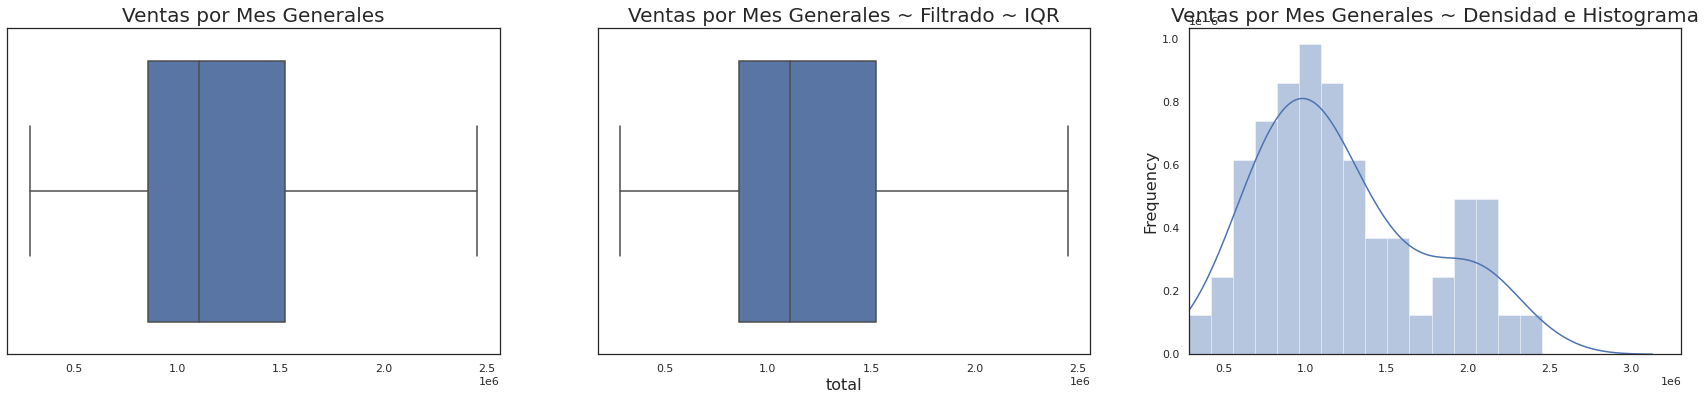

In [ ]:
graficas_boxplots_density(gain_per_month_from_all,6)

###Ganancias por Tienda

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 73665.59798994975
Mediana ~ 47250.0
Media Truncada ~ 59049.23462986198
Desviacion Estandar ~ 82340.32409519535
Rango ~ 632715.0
Quantil 75 ~ 107965.0
Quantil 25 ~ 13725.0
Rango Intercuantilico ~ 94240.0
Curtosis: 7.31178814592883
Asimetría: 2.2051532670797527
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 61874.6537250787
Mediana ~ 44020.0
Media Truncada ~ 53614.94102228047
Desviacion Estandar ~ 58437.93117205539
Rango ~ 248055.0
Quantil 75 ~ 97500.0
Quantil 25 ~ 12230.0
Rango Intercuantilico ~ 85270.0
Curtosis: 0.3838989426925008
Asimetría: 1.0528982372863764


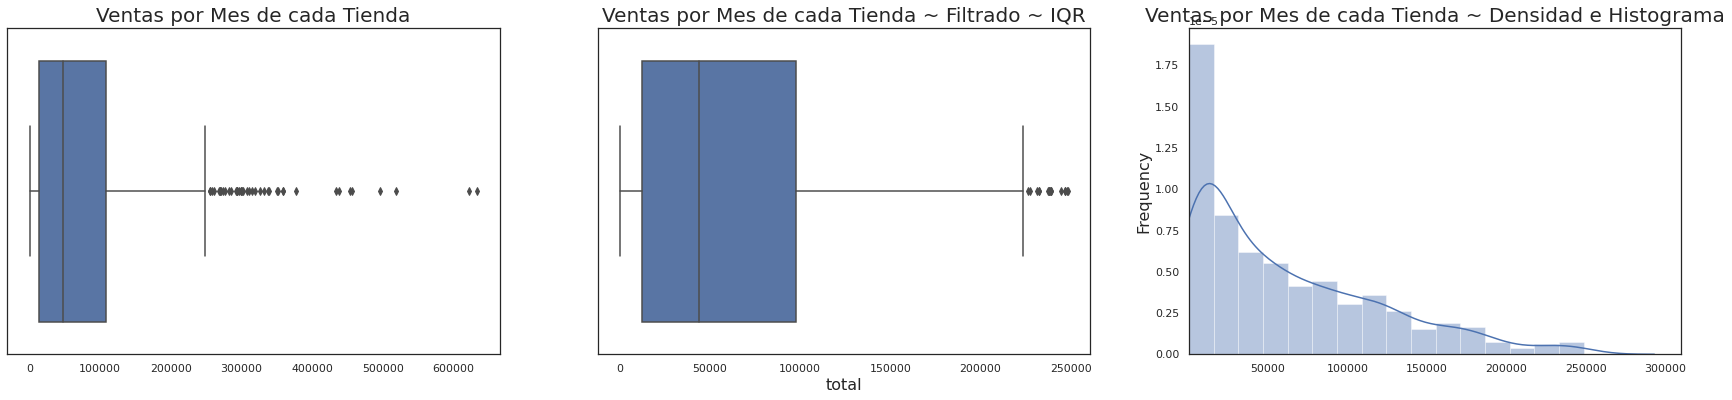

In [ ]:
graficas_boxplots_density(gain_per_month_per_tienda,7)

###Ganancias Totales Recaudadas por cada Bicicleta

>Como se observa a continuacion, se presentan demasiados valores atipicos, lo cual puede afectar gravemente nuestro modelos al momento de predecir nuevos valores en el tiempo.

>Claramente puede observarse el cambio dastrico, donde en un principio se tiene una curtosis de 48.48 mientras que en los datos filtrados se tiene una de .046, esto indica que se tiene una distribucion semi normal, puesto que como podemos observar, realmente se tiene una dispersion positiva, con un valor de 1.09, lo que nos indica que hay mas datos concentrados en la cola derecha de nuestros graficos.

>Finalmente, los valores con diferencias mas significativas son la desviacion estandar de 2817 y rango de 90,600.

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 4743.545819311416
Mediana ~ 3200.0
Media Truncada ~ 3786.4415143180713
Desviacion Estandar ~ 5430.5235834880605
Rango ~ 101905.0
Quantil 75 ~ 5865.0
Quantil 25 ~ 1950.0
Rango Intercuantilico ~ 3915.0
Curtosis: 48.48418754246366
Asimetría: 5.23855602511539
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 3727.750328696976
Mediana ~ 2820.0
Media Truncada ~ 3385.733068073696
Desviacion Estandar ~ 2613.401803602288
Rango ~ 11305.0
Quantil 75 ~ 5330.0
Quantil 25 ~ 1840.0
Rango Intercuantilico ~ 3490.0
Curtosis: 0.46918673314780346
Asimetría: 1.090231251226898


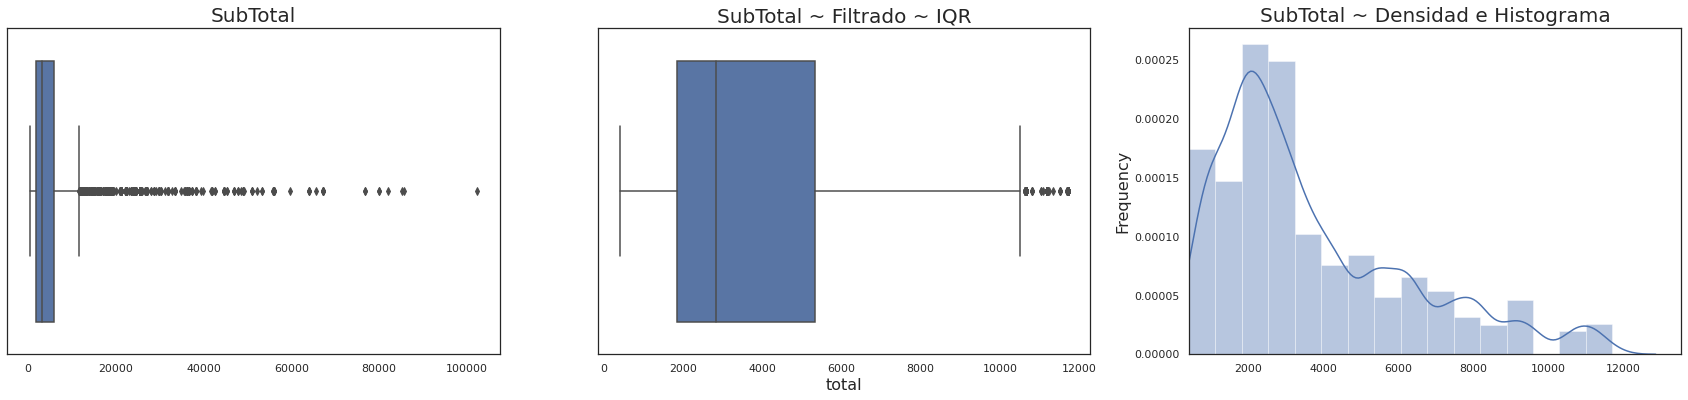

In [ ]:
graficas_boxplots_density(or_bikes['total'],8)

###Edad de Clientes (No implica que hayan adquirido una bicicleta)

Como se observa, los datos estan cargados hacia la derecha, presentando valores atipicos. Cabe mencionar que no son demasiados, de igual forma se hará un analisis mas profundo.

> 

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 44.21494370522006
Mediana ~ 43.0
Media Truncada ~ 43.51979565772669
Desviacion Estandar ~ 11.422891069746523
Rango ~ 64
Quantil 75 ~ 52.0
Quantil 25 ~ 35.0
Rango Intercuantilico ~ 17.0
Curtosis: -0.293753961169013
Asimetría: 0.5167440305592742
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 44.06269270298047
Mediana ~ 43.0
Media Truncada ~ 43.43132220795892
Desviacion Estandar ~ 11.192258115013455
Rango ~ 49
Quantil 75 ~ 52.0
Quantil 25 ~ 35.0
Rango Intercuantilico ~ 17.0
Curtosis: -0.5716312910593171
Asimetría: 0.4362294430828557


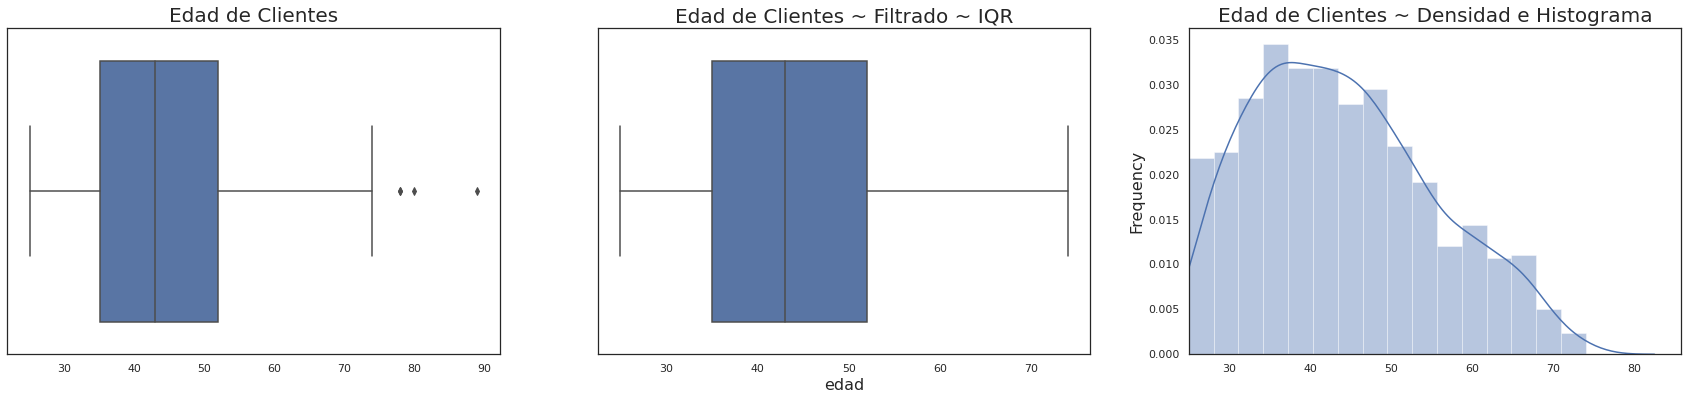

In [ ]:
graficas_boxplots_density(compradores['edad'],9)

###Edad de Compradores de Bicicletas 

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 42.94882729211088
Mediana ~ 41.0
Media Truncada ~ 42.244031830238725
Desviacion Estandar ~ 10.151709453013265
Rango ~ 53
Quantil 75 ~ 50.0
Quantil 25 ~ 36.0
Rango Intercuantilico ~ 14.0
Curtosis: 0.07974383595770762
Asimetría: 0.6508213514415992
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 42.61422413793103
Mediana ~ 41.0
Media Truncada ~ 42.04838709677419
Desviacion Estandar ~ 9.674613985489456
Rango ~ 45
Quantil 75 ~ 49.0
Quantil 25 ~ 36.0
Rango Intercuantilico ~ 13.0
Curtosis: -0.3452502039211973
Asimetría: 0.5015192349211411


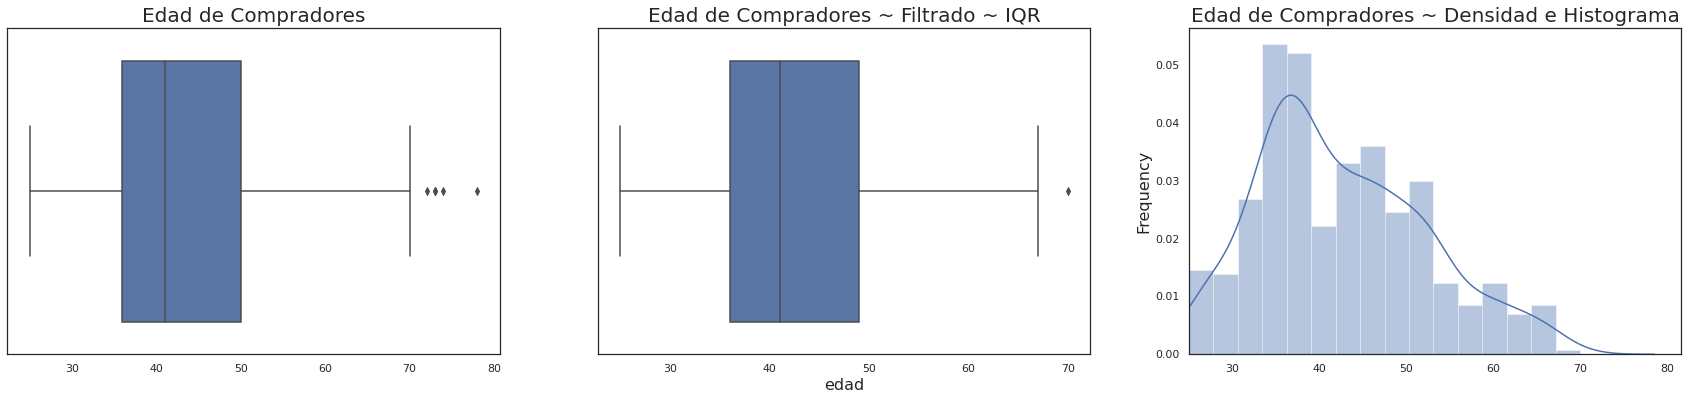

In [ ]:
graficas_boxplots_density(real_buyers['edad'],10)

###Salario de Clientes (No necesariamente compraron una bicicleta)

> De primeras se observa en el boxplot que hay valores atipicos que muy probablemente afecten a la distribucion de nuestros datos. 

> Mas detalladamente se observa una disminucion en los valores de locacion y variabilidad. Los mas significativos son la mediana y la desviacion estandar. Donde se tienen diferencias de 10000 y 4669 respectivamente.

>Por otra parte se observa una distribucion bimodal, donde los datos estan mas cargados hacia la derecha. Como era de esperarse se tiene una menor dispercion de los datos tras aplicar IQR~Score. Donde la desviacion estandar disminuye significativamente.

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 56161.71954964176
Mediana ~ 60000.0
Media Truncada ~ 53524.904214559385
Desviacion Estandar ~ 31249.695872473487
Rango ~ 160000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0
Curtosis: 0.4942871050350126
Asimetría: 0.7594170325729712
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 52534.75935828877
Mediana ~ 50000.0
Media Truncada ~ 51401.86915887851
Desviacion Estandar ~ 26580.503157298106
Rango ~ 110000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0
Curtosis: -0.4925853904421462
Asimetría: 0.3342536460850532


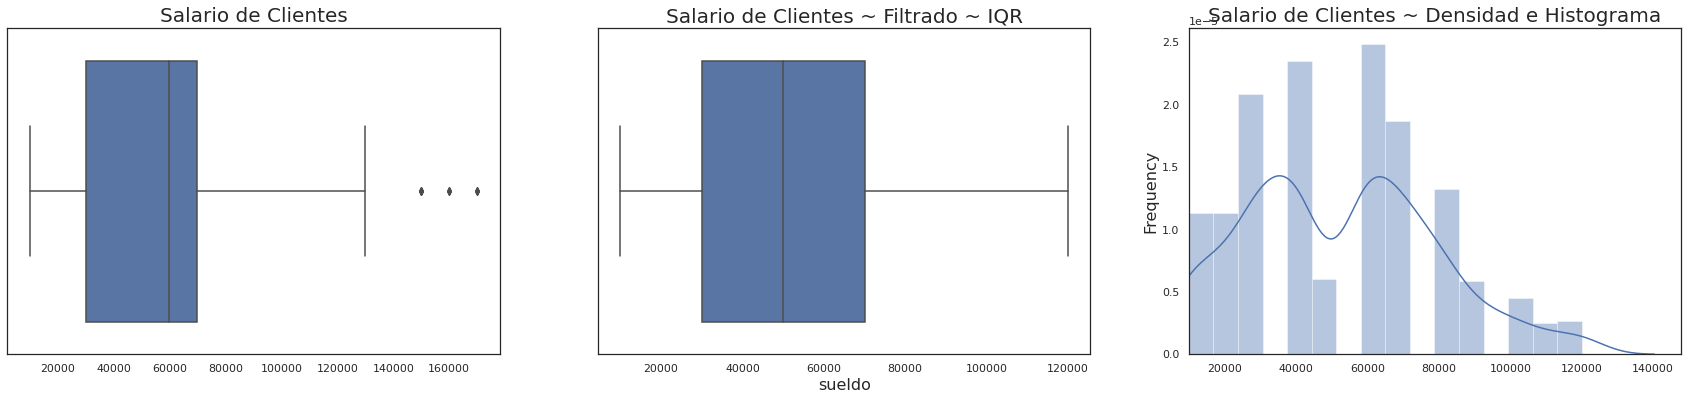

In [ ]:
graficas_boxplots_density(compradores['sueldo'],11)

###Salario de Compradores

>Se puede observar que nuestra distribucion de los datos es bimodal, donde ciertamente era de esperarse tras analizar los datos anteriores.

>Nuevamente los datos estan mas cargados hacia la cola derecha. Tras ver el primer boxplost se observan valores atipicos. Por lo que el IQR~Rango nos vendra bien. Donde estos desaparecen, y con lo cual la dispersion de nuestros datos es menor. Obteniendo una Curtosis final de -.65 aproximadamente. 

Estimados de Locación y Variabilidad ~ Datos Sin filtrar
Media ~ 57846.481876332626
Mediana ~ 60000.0
Media Truncada ~ 55119.36339522547
Desviacion Estandar ~ 31123.030837207913
Rango ~ 160000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 40000.0
Rango Intercuantilico ~ 30000.0
Curtosis: 0.7026298388925971
Asimetría: 0.8229446331564987
Estimados de Locación y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 52511.41552511416
Mediana ~ 60000.0
Media Truncada ~ 51931.818181818184
Desviacion Estandar ~ 24327.920081144235
Rango ~ 100000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0
Curtosis: -0.654583100137395
Asimetría: 0.16745210850266964


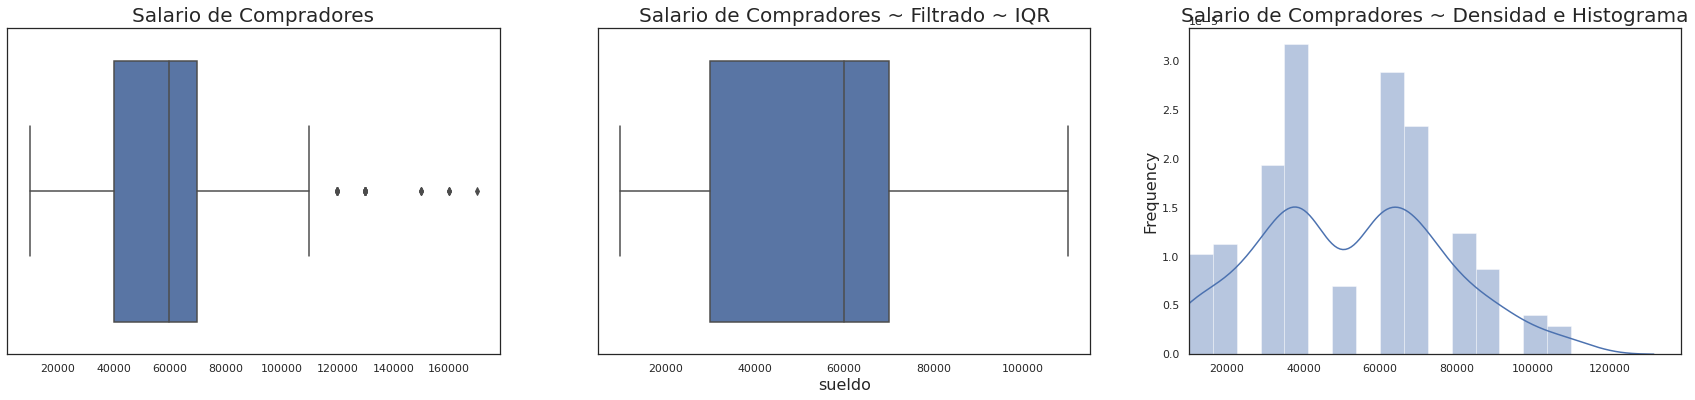

In [ ]:
graficas_boxplots_density(real_buyers['sueldo'],12)

##Conclusion General

>Cuando se hace una primera investigacion de nuestros datos por medio de un boxplot tendremos la posibilidad de observar valores atipicos que nos daran una idea de que tanto estos afectaran los valores de locacion y variabilidad, los cuales juegan un papel importante en el performance(desempeño) de nuestros modelos.

> Donde si se tienen demasiados, o por el contario valores atipicos bastante alejados de la media y mediana, es recomendable hacer un filtro Intercuartílico de nuestros datos, o mejor conocido como Score de Rango Intercuartílico.

> Nunca hay que dejarse llevar por los valores de simetria obtenidos, dado que al realizar un grafico de histograma/densidad podremos darnos cuenta que aun que nuestro valor de simetria nos indique que es una distribucion normal, quiza sea en realidad bimodal o segun sea el caso, multimodal.

#PostWork3
>Agregar anotaciones y títulos a las gráficas que hemos hecho hasta el momento.
Realizar gráficas de barras para explorar la distribución de variables categóricas.

>Realizar tablas de contingencia y gráficas con múltiples axes para explorar dos o más variables categóricas.

>Usar boxplots y violinplots para explorar variables numéricas segmentadas por variables categóricas.

###Datos a trabajar

In [ ]:
educacion = compradores['educacion'].value_counts()
estado_civ = compradores['estado_civil'].value_counts()
dist_viaje = compradores['distancia_d_viaje'].value_counts()
autos = compradores['autos'].value_counts()
profesion = compradores['profesion'].value_counts()# Grupo 1
modelo_bike = str_or_bks['modelo'].value_counts()
cat_1_bks = str_or_bks['categoria_1'].value_counts()
cat_2_bks = str_or_bks['categoria_2'].value_counts()
aleacion = str_or_bks['aleacion'].value_counts()
tiendas = str_or_bks['nombre_tienda'].value_counts() # Grupo 2  
# Se tienen 10 datos Categoricos, Divididos en dos Grupos. 

###Tablas de Contingencia

In [ ]:
def tablas_conting_2(x,y):#Luego meto el return 
  return pd.crosstab(x,y)

def tablas_conting_3(x,y,z):
  return pd.crosstab(x,[y,z])

##Funcion para Graficar Tablas de Contingencia

In [ ]:
def graph_conting(o,i):
  sizess = o.shape;
  if(i==1):
    names = o.index;                        #(Cantidad de filas   , #Cantidad de Columnas)
    fig, axes = plt.subplots(1,sizess[0] , figsize=(14, 6), sharex=True, sharey=True);
    #fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);
    j=0
    for i in names:
      j
      sns.barplot(o.columns, o.loc[i], ax=axes[j]);
      axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=50,fontsize=13);
      axes[j].set_ylabel(names[j],fontsize=15)
      axes[j].set_xlabel('')
      j += 1
  if(i==2):
    names = o.index;                        #(Cantidad de filas   , #Cantidad de Columnas)
    fig, axes = plt.subplots(1,sizess[0] , figsize=(20, 4), sharex=True, sharey=True);
    j=0
    for i in names:
      j
      sns.barplot(o.columns, o.loc[i], ax=axes[j]);
      axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=50,fontsize=13);
      axes[j].set_ylabel(names[j],fontsize=15)
      axes[j].set_xlabel('')
      j += 1
  else:
    names = o.columns;
    title = o.columns.names;
    c= title[0] +' ~ ' + title[1]
    fig, axes = plt.subplots(2,sizess[0] , figsize=(30, 10), sharex=True, sharey=True);
    fig.suptitle(c, fontsize=15);
    r=0
    j=0
    for i in names:
      sns.barplot(o.index, o[i], ax=axes[r,j]);
      axes[r, j].set(xlabel='', ylabel='');
      axes[r,j].set_title(i,fontsize=14)
      axes[r,j].set_xticklabels(axes[r,j].get_xticklabels(), rotation=50,fontsize=13);
      j += 1
      if(j==(sizess[1]/2)):
        r=1
        j=0

##Educacion y Estado Civil

Se observa que aquellos que estan casados tienen un mejor escolaridad que aquellos que estan solteros.

In [ ]:
o=pd.crosstab(compradores['estado_civil'],compradores['educacion'])
#o.index
graph_conting(o,2)

## Profesion , Educacion y Compra de Bicicleta

In [ ]:
pd.crosstab(compradores['profesion'],[compradores['bicicleta_adquirida'],compradores['educacion']], margins=True, margins_name='total') #No me interesan mucho estos datos, quiza si les agrego un tercer nivel. 

>Se puede observar a continuacion que aquellos que adquirieron una bicicleta en gran medida fueron los que tienen una profesion "profesional". Mientras que el grupo laboral que no adquirio una bicicleta se conforma por aqueños que tienen una vida laboral de "management.


>Como era de esperarse, entre mayor es la escolaridad y mejor la profesion laboral, mayor es la probabilidad de que los consumidores compren una bicicleta. 

In [ ]:
o=pd.crosstab(compradores['profesion'],[compradores['bicicleta_adquirida'],compradores['educacion']]) #No me interesan mucho estos datos, quiza si les agrego un tercer nivel. 
graph_conting(o,3)

## Autos ~ Adquisicion de Bicicleta ~ Distancia de Viaje

##Distancia de Viaje y Adquisicion de Bicicleta

>Se presenta que el grupo que compra mas bicicletas es aquel que no tiene autos. mientras que aquellas poblaciones que tienen mas de 4 por lo regular no adquieren ninguna como se muestra a continuacion. 

##Autos y Distancia recorrida

In [ ]:
pd.crosstab(compradores['autos'],compradores['distancia_d_viaje'])

In [ ]:
o = tablas_conting_2(compradores['bicicleta_adquirida'],compradores['distancia_d_viaje']);
graph_conting(o,2)

###Distancia de Viaje y Autos

Como podemos ver, entre menos sea la distancia que una persona tenga que recorrer para llegar a su punto de encuentro (por asi llamarlo), se tiende a no necesitar un auto como medio de transporte. 

>Por otra parte se tiene que aquellos que tienen 2 autos presentan una distribucion mas uniforme respecto al numero de autos y la distancia de viaje. 

> Finalmente, todos los valores decrecen conforme se tienen mas autos. Como se puede observar en las siguientes graficas.

In [ ]:
o = pd.crosstab(compradores['autos'],compradores['distancia_d_viaje'])
#o.shape # (5,5)
graph_conting(o,2)

>Como era de suponerse se tiene que entre menos autos, mayor es la probabilidad de adquirir una bicicleta, en especial cuando se tienen que recorrer las menores millas posibles. 

>Cabe mencionar que cuando se tienen dos autos, menor es la probabilidad de compra como podemos observar a continuacion. 

###Distancia de Viaje, Adquision de Bicicleta(Yes/No) y Autos(0,1,2,3,4)

Aquellos que recorren una distancia menor, son los que tienden a comprar mas bicicletas. Mientras que aquellos que recorren una mayor distancia son los que en general deciden no comprar una bicicleta. 

Finalemente se tiene que entre mas autos una persona/familia tenga, se tiene una menor compra de bicicletas. Donde el cambio mas representativo ocurre cuando se tienen mas de 2 autos. Y cuando estos recorren mas de 5 millas.

In [ ]:
o = tablas_conting_3(compradores['distancia_d_viaje'],compradores['bicicleta_adquirida'],compradores['autos'])
graph_conting(o,3)

##Genero ~ Estado Civil ~ Adquisicion de Bicicleta

###Genero y Adquisicion de Bicicleta

In [ ]:
o = pd.crosstab(compradores['genero'],compradores['bicicleta_adquirida'])

In [ ]:
pd.crosstab(compradores['genero'],compradores['bicicleta_adquirida'])

###Estado Civil y Genero

In [ ]:
o = pd.crosstab(compradores['estado_civil'],compradores['genero'])

In [ ]:
pd.crosstab(compradores['estado_civil'],compradores['genero'])

##Estado Civil, Genero y Adqusicion de Bicicleta

In [ ]:
pd.crosstab(compradores['estado_civil'],[compradores['bicicleta_adquirida'],compradores['genero']], margins=True, margins_name='total')

In [ ]:
o = pd.crosstab(compradores['estado_civil'],[compradores['bicicleta_adquirida'],compradores['genero']])
graph_conting(o,3)

*texto en cursiva*#Funcion para Graficos de Barras

In [ ]:
def porcentajes_data(x):
  return x*100/x.sum()

In [ ]:
def bar_plots(x,i,s,t):
  sns.set(style="white")
  fig, axes = plt.subplots(figsize=(s,t))
  o=['Educacion','Estado Civil','Distancia Viajada','Autos','Profesion','Modelo ~ Bicicleta','Categoria 1 ~ Bicicletas','Categoria 2 ~ Bicicletas','Aleacion','Tiendas']
  a='Conteo ~ '
  b=' ~ Porcentaje'
  c=a+o[i]+b
  ax = sns.barplot(x.index, porcentajes_data(x))
  #sns.set(rc={'figure.figsize':})
  ax.set_title(c,fontsize=15)
  ax.set(ylabel='porcentaje del total'); 
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize= 15);

##Datos Filtrados ~ Compraron una Bicicleta

In [ ]:
educacion_2 = real_buyers['educacion'].value_counts()
estado_civ_2 = real_buyers['estado_civil'].value_counts()
dist_viaje_2 = real_buyers['distancia_d_viaje'].value_counts()
autos_2 = real_buyers['autos'].value_counts()
profesion_2 = real_buyers['profesion'].value_counts()# Grupo 1

##Nota
>No se agrega una descripcion aquellos graficos que van en decremento, pues los resultados que se obtienen son bastante claros, dado que se observa que aquellos que tienen mas impacto van en orden decreciente a comparacion del resto. Como el siguiente grafico que se presenta a continuacion. (Educacion)

>Los que tienen un titulo son los que compraron mas bicicletas, seguido de aquellos que no terminaron la universidad, luego, estan aquellos que tienen un doctorado/maestria, seguido de aquellos que terminaron la prepa y finalmente los que no la terminaron.

###Educacion

In [ ]:
bar_plots(educacion_2,0,5,4)

###Autos

Increiblemente aquellos que tienen 1 auto, compraron mas bicis que aquellos que no tienen ninguno.

In [ ]:
bar_plots(autos_2,3,5,5)

###Estado Civil

Los solteros compraron mas que los casados, algo inesperado. Puesto que si tienes una pareja, por obvio seria comprar dos, y por lo tanto, se tendria un mayor numero.

In [ ]:
bar_plots(estado_civ_2,1,5,5) 

###Profesion

In [ ]:
bar_plots(profesion_2,4,5,5)

Aleacion

###Modelos de Bicicletas Vendidas (Primeras 20)

In [ ]:
bar_plots(modelo_bike.head(20),5,25,6)

###Categoria 1 ~ Road y Mountain

In [ ]:
bar_plots(cat_1_bks,1,5,5)

###Categoria 2 ~ 

In [ ]:
bar_plots(cat_2_bks,1,10,5)

###Aleacion

In [ ]:
bar_plots(aleacion,8,5,5)

###Tiendas

In [ ]:
bar_plots(tiendas,6,35,10)

##Boxplots y Violins

###Funcion ~ Boxplots ~ Violins

In [ ]:
def BoxplotsViolins(x,i,j,s,t): #x DataFrame. i,j ~ Sep,Yess. s,t ~ Figsize  
  fig, axes = plt.subplots(2,1, figsize=(s,t),sharex=True, sharey=True);
  sep = ['categoria_1','categoria_2','aleacion','nombre_tienda','ciudad','estado','bicicleta_adquirida',] #0 - 6
  yss = ['total','edad','sueldo'] # 0 - 2
  #plt.figure(figsize=(40, 10))
  #Se aplicara Rango Intercuantilico Para "Eliminar" Datos Atipicos y poder Observar mejor las distribuciones de nuestras variables. 
  if(j==0):
    iqr = x.total.quantile(0.75) - x.total.quantile(0.25)
    filtro_inferior = x.total > x.total.quantile(0.25) - (iqr * 1.5)
    filtro_superior = x.total < x.total.quantile(0.75) + (iqr * 1.5)
    df_filtrado = x.total[filtro_inferior & filtro_superior]
  elif(j==1):
    iqr = x.edad.quantile(0.75) - x.edad.quantile(0.25)
    filtro_inferior = x.edad > x.edad.quantile(0.25) - (iqr * 1.5)
    filtro_superior = x.edad < x.edad.quantile(0.75) + (iqr * 1.5)
    df_filtrado = x.edad[filtro_inferior & filtro_superior]
  elif(j==2):
    iqr = x.sueldo.quantile(0.75) - x.sueldo.quantile(0.25)
    filtro_inferior = x.sueldo > x.sueldo.quantile(0.25) - (iqr * 1.5)
    filtro_superior = x.sueldo < x.sueldo.quantile(0.75) + (iqr * 1.5)
    df_filtrado = x.sueldo[filtro_inferior & filtro_superior]

  sns.boxplot(data=x, x=sep[i], y=df_filtrado,ax=axes[0]);
  sns.violinplot(data=x, x=sep[i], y=df_filtrado,ax=axes[1]);
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=50,fontsize=13);
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=13);


## Total ~ Categoria 1

La categoria uno se conforma por Road y Montain, un parte aguas importante en las bicicletas.

>Como podremos observar en nuestro boxplot, se tienen demasiados valores atipicos en Road, por lo que es claro que se tienen menores ganacias cuando se escoje la categoria road. Ademas, como se observa, el rango intercuantilico tambien es menor, asi como la mediana de las ganancias en comparancion con la categoria Mountain. 

>Finalmente se tienen distribuciones multimodales en ambas categorias, pero estas son mas presentes en la categoria Mountain comparada con Road.

In [ ]:
BoxplotsViolins(str_or_bks,0,0,10,10)

Categoria 2 es donde se tienen las divisiones mas claras en cuanto a bicicletas. Formando un total de 9 diferentes tipos.

>Como podemos observar en los boxplots, las bicicletas con mayores ganancias y consistentes estan formadas principalmente por "Over Mountain", "Cross Country Race" y "Triathalon", dado que estas no presentan valores atipicos como se muestra. 

>Luego se tiene, que aquellas con menores ventas estan conformadas por "Sport" principalmente, seguido de "CycloCross" y "Fat Bike". Puesto que son las que tienen rangos intercuantilicos mas pequeños, asi como cuartiles superiores menores a differencia del resto de categorias, y finalmente los menores outliers.

>Por el lado de los violin plots podemos observar que se tienen distribuciones multimodales en la gran parte de nuestras categorias. Donde las que destacan mas, son "Over Mountain" y "Cross Country Race" teniendo multiples picos.

In [ ]:
BoxplotsViolins(str_or_bks,1,0,15,10)

##Total ~ Ciudad

>A continuancion podemos observar que las ciudades con ganancias mas consistentes son conformadas por detroit, louisville, indianapolis, los angeles y Nashville. Puesto que son las ciudades que tienen menores valores atipicos a comparancion del resto de las ciudades.

>Por otra parte, como era de esperarse, aquellas ciudades que presentan distribuciones normales pequeñas (achicopaladas) en los violin plots son aquellas que han tenido menores ganancias, y que ademas presentan demasiados valores atipicos, como lo es la ciudad de San Francisco, Phoenix, Providence, Las Vegas entre muchas otras. 

> Mientras que aquellas distribuciones mas raras e incluso donde se acercan a ser bimodales (Como lo es el caso de Columbus) son las que tienen mejores ganancias y menores valores atipicos como se muestran en sus respectivos boxplots.

In [ ]:
BoxplotsViolins(str_or_bks,4,0,23,10)

El Analisis para las tiendas es bastante similar al de las ciudades, por lo que se omite, pero se deja para tener mas informacion sobre lo que ocurre con cada tienda.

In [ ]:
BoxplotsViolins(str_or_bks,3,0,25,10)

##Edad ~ Compradores de Bicicleta

>Como podemos observar a continuancion, se tiene que entre mas jovenes son los consumidores, mayor es la probabilidad de que estos compren. Como se observa en el boxplot, se tienen valores atipicos cuando estos son mayores, por lo que podemos asegurar nuestro argumento.

>Como se observa en el los violins, se presenta una distribucion bimodal en la edad de aquellas personas que no han comprado una bicicleta. Con picos aproximados en las edades de 30 y 45 años. 

>Mientras que en la distribucion de aquellos que si compraron bicicletas se presenta un pico en la edad de 35 años aproximadamente. Y disminuciones en las edades de 30 y 45 (aprox.) como era de esperarse y viceversa. Finalmente se tiene un rango intercuantilico menor en aquellos que si compraron en comparacion a lo que no. 

In [ ]:
BoxplotsViolins(compradores,6,1,6,10)

##Salario ~ Compradores de Bicicleta

>En esta ocasion se observa que aquellos con mayor salario tienden a comprar mas bicis que aquellos que no, como se observa en nuestro boxplot, la mediana es mucho mayor, asi como el rango intercuantilico.

>Por otra parte, en los violin plots podemos observar distribuciones bimodales, pero no se encuentra un patron a diferencia del que encontramos en el violinplot de edades.

In [ ]:
BoxplotsViolins(compradores,6,2,6,10)

#PostWork 4
>Realizar análisis bivariado con variables numéricas

>Explorar las relaciones existentes entre nuestras variables numéricas,mediante matriz de correlaciones y pairplot

>Analizar valores atípicos y decidir qué hacer con ellos

>Entrenar modelos de regresión lineal para realizar predicciones



##Matriz de correlaciones

Obtenemos una matriz de correlaciones de Pearson con la función dataframe.corr() de pandas. 
Automáticamente se va a aplicar a las columnas con datos numéricos. 


In [ ]:
compradores.corr()

In [ ]:
Ahora representamos la matriz como mapa de calor

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(compradores.corr(), vmin=-1, vmax=1, annot=True, cmap="YlOrRd", linewidths=.2);

La mayoría de las correlaciones son muy débiles, lo cual no es extraño ya que la mayoría de los datos del dataframe son categóricos y los numéricos no necesariamente tienen que estar correlacionados. Aún así, las mejores correlaciones se encuentran entre "edad" e "hijos, y entre "autos" y "sueldo".

##Pairplots

Con los pairplots podemos tener más criterio para definir si nuestras variables están correlacionadas. 



In [ ]:
sns.pairplot(compradores);

Como se observa, nuestros mejores candidatos en el heatmap realmente incluyen una variable categórica. Entre "edad" y "id_comprador" se da mayor distribución sin forma categórica, pero además de que no hace mucho sentido para el objetivo del proyecto, la correlación es muy débil. 

##Datos atípicos

Como hemos visto a lo largo de nuestro analisis (Postwork 2), se ha tomado la decisión de filtar nuestros datos a partir del rango intercuantilico, dado que se tienen demasiados valores atipicos que causan bastante ruido, los cuales afectan principalmente la dispersión y el coeficiente de correlación de Pearson. 

##Modelo de Regresión Líneal

Queda claro que nuestros datos son en mayoría categóricos, por lo que en sí no es posible realizar un modelo de regresión líneal (al final terminaremos creando un modelo de regresión logística). Sin embargo con fines de práctica, forzaremos el modelo entre las variables que resultaron más aptas, "id_comprador" y "edad", ya que aunque la correlación es muy débil, es negativa. 

In [ ]:
sns.scatterplot(x=compradores['id_comprador'],y=compradores['edad']);

In [ ]:
#importamos el modelo de la librería stick-learn
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

# Usamos 'to_frame' para crear una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(compradores['id_comprador'].to_frame(), compradores['edad'])

LinearRegression()

In [ ]:
#intentamos predecir y 
y_predict = lr.predict(compradores['id_comprador'].to_frame())

In [ ]:
#creamos nuestra gráfica de y original vs y predecida(en naranja)
sns.scatterplot(x=compradores['id_comprador'], y=compradores['edad'], s=40);
sns.scatterplot(x=compradores['id_comprador'], y=y_predict, s=25);

In [ ]:
#vemos el margen de error de cada punto

sns.scatterplot(x=compradores['id_comprador'], y=compradores['edad'], s=40);
sns.scatterplot(x=compradores['id_comprador'], y=y_predict, s=25);

for i in range(len(compradores['id_comprador'])):
    plt.plot([compradores['id_comprador'][i], compradores['id_comprador'][i]], [compradores['edad'][i], y_predict[i]], 'g--')

In [ ]:
#Gráficamos la línea de tendencia rojo

sns.scatterplot(x=compradores['id_comprador'], y=compradores['edad'], s=40);
sns.lineplot(x=compradores['id_comprador'], y=y_predict, color='#B92706');

In [ ]:
#Extraemos la ecuación de la recta del modelo ya entrenado
intercept = lr.intercept_
coefficient = lr.coef_[0]

In [ ]:
#Imprimimos la ecuación de la recta
print(f'y = {coefficient} * x + {intercept}')



y = -0.00011339669340707472 * x + 46.478434326465944


In [ ]:
#Comprobamos
print(f'Valor de x: {compradores["id_comprador"][10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * compradores["id_comprador"][10] + intercept}')

Valor de x: 11434
Valor predecido por nuestro modelo: 45.18185653404945
Valor cuantificado directamente usando la funcion: 45.18185653404945


Se ha intentado hacer un modelo de regresión lineal, y ha funcionado pero no tiene mucho sentido, ya que nuestros datasets se componen en su gran parte de variables categoricas. Posteriormente se hará un modelo de regresion logistica (Postwork 8).

#Postwork 5

>Vamos a aplicar la técnica de bootstrap para analizar el sesgo en las distribucuiones ya analizadas . De cada grupo de datos se obtendrá por boostrap:

a) La distribución, su asimetría y curtosis

b) El error estándar

c) El intervalo de confianza que te parezca más apropiado

>Si es pertinente con los datos, entrenar un modelo de regresión líneal. 

##Función de Bootstrap

Con la siguiente función se hacen todos los pasos del bootstrap, tomando subconjutnos aleatorios con reposición (para no alterar la probabilidad al seleccionar) y obteniendo la media. La distribución de las medias de los subconjuntos debe ser normal de acuerdo al Teorema del Límite Central, de lo contrario comenzamos a tener incertidumbre en los datos. 

In [ ]:
def all_in_one_bootstrap(x):
  
  means = []

  for i in range(100_000):
      if len(x)<30: #Realiza la toma aleatoria de acuerdo al tamaño del grupo
        sample = x.sample(n=20, replace=True) 
        means.append(sample.mean())
      else: 
        sample = x.sample(n=50, replace=True) 
        means.append(sample.mean())
    
  serie_means = pd.Series(means)

  limite_inferior = serie_means.quantile(0.025)
  limite_superior = serie_means.quantile(0.975)

  mean_of_intervals = ((x.mean() - limite_inferior) + (limite_superior - x.mean())) / 2

  print(f'{Fore.CYAN}Media {Style.RESET_ALL}~ {x.mean()}') #  ~ Media
  print(f'{Fore.CYAN}Asimetria {Style.RESET_ALL}~ {serie_means.skew()}') # ~ Asimetria
  print(f'{Fore.CYAN}Curtosis {Style.RESET_ALL}~ {serie_means.kurtosis()}') #~ Curtosis  
  print(f'{Fore.CYAN}Error Estandar {Style.RESET_ALL}~ {serie_means.std()}')   #  ~ Error Estandar
  print(f'{Fore.CYAN}Valor minimo {Style.RESET_ALL}~ {serie_means.min()}') # ~ Valor minimo
  print(f'{Fore.CYAN}Valor maximo {Style.RESET_ALL}~ {serie_means.max()}') # ~ Valor maximo
  print(f'{Fore.CYAN}Rango {Style.RESET_ALL}~ {serie_means.max() - serie_means.min()}') # ~ Rango
  print(f'{Fore.CYAN}Intervalo de 95% confianza de la media {Style.RESET_ALL}~{limite_inferior} < {x.mean()} < {limite_superior}') #limites al 95%
  print(f'{Fore.CYAN}Intervalo de 95% confianza de la media {Style.RESET_ALL}~ {x.mean()} +/- {mean_of_intervals}') #media +- rango de intervalos

  #Graficamos
  sns.displot(serie_means, kde=False)
  plt.axvline(limite_inferior)
  plt.axvline(limite_superior);


Como son bastantes datos a analizar sólo se da un comentario breve en cada caso y se da un comentario general al final. 

##Items vendidos por tienda
Normalidad aceptable. 

In [ ]:
all_in_one_bootstrap(items_sold_per_tienda)

##Items vendidos por Bici
Normalidad excelente

In [ ]:
all_in_one_bootstrap(items_sold_per_bici)

##Ganancias por Bici
Muy buena normalidad

In [ ]:
all_in_one_bootstrap(gains_per_bici)

##Ganancias por tienda
Normalidad aceptable

In [ ]:
all_in_one_bootstrap(gains_per_tienda)

##Ganancias por Orden
Normalidad muy buena

In [ ]:
all_in_one_bootstrap(gain_per_order)

##Ganancias por Ciudad
Normalidad aceptable

In [ ]:
all_in_one_bootstrap(gain_per_city)

##Ganancias por Mes de Todas las tiendas
Normalidad excelente

In [ ]:
all_in_one_bootstrap(gain_per_month_from_all)

##Ganancias por Mes de Cada Tienda
Normalidad  Buena

In [ ]:
all_in_one_bootstrap(gain_per_month_per_tienda)

##Subtotal
Ligeramente cargado hacia la izquierda

In [ ]:
all_in_one_bootstrap(or_bikes['total'])

##Edad de Clientes (No implica que hayan comprado bicicletas)
Normalidad excelente

In [ ]:
all_in_one_bootstrap(compradores['edad'])

##Edad de Compradores de Bicicletas
Normalidad excelente

In [ ]:
all_in_one_bootstrap(real_buyers['edad'])

##Salario de Clientes (No implica que hayan comprado una bicicleta
Normalidad excelente

In [ ]:
all_in_one_bootstrap(compradores['sueldo'])

##Salario de Compradores de Bicicletas
Normalidad muy buena

In [ ]:
all_in_one_bootstrap(real_buyers['sueldo'])

##Conclusión Bootstrap
La gran mayoría de nuestros grupos de datos cuenta con una normalidad excelente o muy buena , lo cual cumple el teorema del límite central y nos dice que los datos están sesgadoz y tienen baja incertidumbre. Algunos con calores de asimetría y curtosis entre 0.3 y 0.5 muestran una ligera carga a la izquierda, pero aún pueden pasar como normales en un criterio no muy estricto, sólo en "Subtotal" los datos parecen tener un sezgo ligero con los datos distribuídos hacia la izquierda.
En todos los casos se tomó un intervalo de confianza del 95% ya que lo consideramos el mínimo para que los resultados sean aceptables.

##Entrenamiento de modelo de Regresión Lineal Múltiple
Como se ha evidenciado en nuestros data frames, nuestros datos son categóricos y los numéricos tienen una correlación demasiado baja, por lo que no es pertinente realizar un modelo de Regresión Líneal Múltiple. Al final nos quedamremos con un modelo de Regresión Logística

# Postwork 6

In [ ]:
path = "https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv"
df = pd.read_csv(path)
df = df.drop(['ID'], axis = 1)
df.head()

In [ ]:
education = list(pd.unique(df['Education']))
counts = df.value_counts(["Education", "Gender"])
y1 = [counts[value]['Male'] for value in education]
y2 = [counts[value]['Female'] for value in education]

In [ ]:
plt.bar(education, y1, color='r', label = 'male')
plt.bar(education, y2, bottom=y1, label = 'female', color='b')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(x="Children", y="Income", data=df, hue="Region")
plt.legend(loc="upper left")
plt.show()

In [ ]:
path = "https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true"
df2 = pd.read_excel(path)
df2 = df2.drop(['bikeshop.id'], axis = 1)
df2.head()

In [ ]:
sns.scatterplot(x = "latitude", y = 'longitude', data = df2, hue = 'bikeshop.state')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

# Postwork 7
Para el proposito de este proyecto, no es necesario aplicar NLP

# Postwork 8

In [ ]:
path = "https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv"
df = pd.read_csv(path)
df_copy = df.copy()

## Limpieza de los datos

Vamos a limpiar nuestro dataset para seleccionar nuestras variables independientes X y nuestra variable dependiente y, además de procesar los datos para transformar valores categóricos a su representación númerica

Revisaremos primero si podemos sustituir valores nulos de algunas columnas para no remover filas de nuestro dataset

In [ ]:
df_copy.isna().sum()

In [ ]:
df_copy.dropna(subset = ['Income','Children','Home Owner', 'Cars','Age','Marital Status'], axis = 0, inplace = True)
df_copy.isna().sum()

In [ ]:
pd.unique(df_copy['Gender'])

In [ ]:
df_copy.isna().sum()

In [ ]:
df_copy['Gender'].replace(np.nan, 'Other', inplace=True)

In [ ]:
df_copy.reset_index(drop = True, inplace = True)

## Transformación de los datos

Vamos a obtener la representación númerica de las variables categóricas del conjunto de datos

In [ ]:
df_copy['Purchased Bike'] = df_copy['Purchased Bike'].map({'Yes':1, 'No':0})
#df_copy['Marital Status'] = df_copy['Marital Status'].map({'Married':1, 'Single':0})
#df_copy['Home Owner'] = df_copy['Home Owner'].map({'Yes':1, 'No':0})

df_copy = df_copy.drop(['ID'], axis = 1)

In [ ]:
df_copy.head()

## Obtención de de dummies para variables categóricas

In [ ]:
X_list = ['Marital Status', 'Gender','Income', 'Region','Home Owner', 'Cars','Age'] #Lista para seleccionar los atributos para el modelo
X_list_excluded = df_copy.columns.difference(X_list) #Lista con los atributos que NO se usaran
categorical_list = ['Marital Status', 'Gender','Home Owner', 'Region'] #Lista con los atributos de los que obtendremos los dummies

In [ ]:
df_list = []
for categorical in categorical_list:
    df_list.append(pd.get_dummies(df_copy[categorical], drop_first=True))

In [ ]:
for dataframe in df_list:
    df_copy = pd.concat([df_copy, dataframe], axis = 1)
    
df_copy.head()

In [ ]:
df_copy = df_copy.drop(categorical_list, axis = 1)

In [ ]:
df_copy.head()

## Selección de atributos y modelo logístico

In [ ]:
X = np.asarray(df_copy.drop(X_list_excluded, axis = 1))
y = np.asarray(df_copy['Purchased Bike'].astype('int'))

Normalizaremos el conjunto de datos

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

## Entrenamiento/Pruebas del modelo

Dividiremos los datos en un 80% para entrenamiento y el 20% restante para probar el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Definimos nuestro modelo logístico

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora vamos a predecir usando nuestros datos de pruebas

In [ ]:
yhat = LR.predict(X_test)
yhat

**predict_proba** devuelve estimaciones para todas las clases, ordenadas por la etiqueta de las clases. Entonces, la primera columna es la probabilidad de la clase 0, P(Y=0|X), y la segunda columna es la probabilidad de la clase 1, P(Y=1|X):

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

## Evaluación

## Matriz de confusión

Vamos a evaluar nuestro modelo con la matriz de confusión.

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[55 24]
 [44 70]]


In [ ]:
print(classification_report(y_test, yhat))

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

In [ ]:
importance = LR.coef_.flatten()
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(df_copy.drop(X_list_excluded, axis = 1).columns, importance)
plt.title('Resumen de la importancia de los atributos')
plt.xlabel('Puntuación')
plt.show()


In [ ]:
LR.score(X_test, y_test)

In [ ]:
path = "https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true"
df = pd.read_excel(path)
df = df.drop(['bikeshop.id'], axis = 1)
df.head()

## Selección de atributos

In [ ]:
X = df.iloc[:, 3:5]
X

## Encontrando el número óptimo de Clusters

In [ ]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [ ]:
number_clusters = list(range(1,21))
plt.plot(number_clusters, wcss)
plt.show()

Podemos observar que el número óptimo de clusters sería de 8 a 10

## Clustering y Resultados

In [ ]:
kmeans = KMeans(8)
kmeans.fit(X)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

In [ ]:
data_clusters = df.copy()
data_clusters['Cluster'] = identified_clusters
data_clusters.head()

In [ ]:
plt.scatter(data_clusters['longitude'], data_clusters['latitude'], c =  data_clusters['Cluster'])
plt.show()